# Categorical Data Encoding

Machine learning algorithms could not work directly with categorical data, because there is no intrinsic mathematical relations. As a result, categorical data needs to be encoded into usable, mathematical data using one of the following most common techniques for different types of categorical variables:

1. One-Hot Encoding
2. Count Encoding
3. Binary Encoding (Similar to One-Hot Encoding but encodes in binary digits (8-digit)
3. Ordinal Encoding
4. Catboost Encoding (Alternative to Leave-One-Out Encoding)

The flowchart below describes the process of selecting the most suitable encoding method for categorical data:
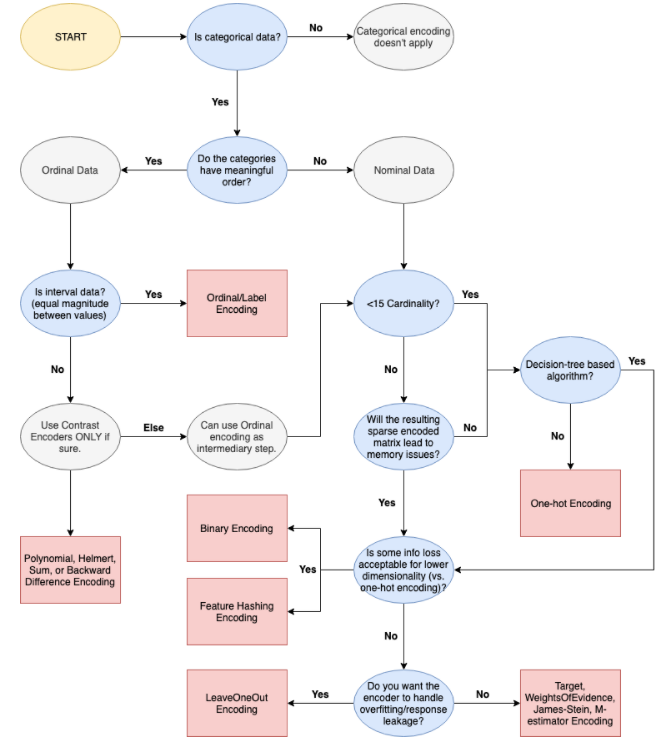

Note that this notebook only covers categorical data encoding methods that are most useful in most scenarios.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import category_encoders as ce
import feature_engine.imputation as fei
%matplotlib inline
pd.set_option('display.max_rows',100)

In [2]:
data = pd.read_csv('owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155858 entries, 0 to 155857
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    155858 non-null  object 
 1   continent                                   146487 non-null  object 
 2   location                                    155858 non-null  object 
 3   date                                        155858 non-null  object 
 4   total_cases                                 153028 non-null  float64
 5   new_cases                                   152977 non-null  float64
 6   new_cases_smoothed                          151826 non-null  float64
 7   total_deaths                                135644 non-null  float64
 8   new_deaths                                  135820 non-null  float64
 9   new_deaths_smoothed                         135688 non-null  float64
 

In [4]:
catimputer = fei.CategoricalImputer(imputation_method='frequent')
data[['continent']] = catimputer.fit_transform(data[['continent']])
catimputer = fei.CategoricalImputer(imputation_method='missing', fill_value='Missing')
data[['tests_units']] = catimputer.fit_transform(data[['tests_units']])

In [5]:
numerical_columns = []
categorical_columns = []
for column in data.columns:
    if data[column].dtype == float:
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)

In [6]:
data_categories = data[categorical_columns]
data_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155858 entries, 0 to 155857
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   iso_code     155858 non-null  object
 1   continent    155858 non-null  object
 2   location     155858 non-null  object
 3   date         155858 non-null  object
 4   tests_units  155858 non-null  object
dtypes: object(5)
memory usage: 5.9+ MB


In [7]:
data_categories.nunique()

iso_code       238
continent        6
location       238
date           750
tests_units      5
dtype: int64

## One Hot Encoding

One-Hot Encoding uses binary values (0 or 1) for every category.

This method is most suitable for variables with lower cardinality and it is the best option for categorical data encoding, but this method may lead to curse of dimensionality for ML algorithms.

In [8]:
encoder = ce.OneHotEncoder(cols=['continent','tests_units'],use_cat_names=True)
data_categories_transformed = encoder.fit_transform(data_categories)
data_categories_transformed.head()

,iso_code,continent_Asia,continent_Africa,continent_Europe,continent_North America,continent_South America,continent_Oceania,location,date,tests_units_Missing,tests_units_tests performed,tests_units_people tested,tests_units_units unclear,tests_units_samples tested
0,AFG,1,0,0,0,0,0,Afghanistan,2020-02-24,1,0,0,0,0
1,AFG,1,0,0,0,0,0,Afghanistan,2020-02-25,1,0,0,0,0
2,AFG,1,0,0,0,0,0,Afghanistan,2020-02-26,1,0,0,0,0
3,AFG,1,0,0,0,0,0,Afghanistan,2020-02-27,1,0,0,0,0
4,AFG,1,0,0,0,0,0,Afghanistan,2020-02-28,1,0,0,0,0


## Count Encoding

Count encoding maps the frequency of every category to its respective categories.

This method is most suitable for variables with higher cardinality without multiple categories having same frequency.

In [9]:
encoder = ce.count.CountEncoder(cols=['location'],normalize=False)
data_categories_transformed = encoder.fit_transform(data_categories)
data_categories_transformed['location'].unique()

array([696, 707, 695, 689, 671, 663, 678, 750, 690, 729, 725, 675, 688,
       674, 692, 716, 668, 672, 685, 680, 658, 686, 661, 694, 682, 683,
       681, 660, 724, 676, 697, 630, 244, 679, 677, 718, 673, 669, 706,
       670, 717, 728, 687, 656, 721, 722, 727, 703, 359, 666, 693, 713,
       701, 691, 700, 720, 305, 247, 667, 699, 617, 662, 449, 364, 664,
       286, 726,  43, 317, 151, 684,  85, 500, 655, 428, 654, 253, 465,
       698, 719, 735, 629, 747, 114, 275, 183, 179, 436, 458, 650],
      dtype=int64)

## Binary Encoding

Binary encoding also uses binary values (0 or 1) for encoding every category in binary bitstrings format (8 digits).

This method is suitable for variables with higher cardinality, provided some degree of information loss is acceptable.

Note that this method is similar to one hot encoding, but this method reduces memory space.

In [10]:
encoder = ce.BinaryEncoder(cols=['location'])
data_categories_transformed = encoder.fit_transform(data_categories)
data_categories_transformed

,iso_code,continent,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,date,tests_units
0,AFG,Asia,0,0,0,0,0,0,0,1,2020-02-24,Missing
1,AFG,Asia,0,0,0,0,0,0,0,1,2020-02-25,Missing
2,AFG,Asia,0,0,0,0,0,0,0,1,2020-02-26,Missing
3,AFG,Asia,0,0,0,0,0,0,0,1,2020-02-27,Missing
4,AFG,Asia,0,0,0,0,0,0,0,1,2020-02-28,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
155853,ZWE,Africa,1,1,1,0,1,1,1,0,2022-01-15,tests performed
155854,ZWE,Africa,1,1,1,0,1,1,1,0,2022-01-16,tests performed
155855,ZWE,Africa,1,1,1,0,1,1,1,0,2022-01-17,Missing
155856,ZWE,Africa,1,1,1,0,1,1,1,0,2022-01-18,Missing


## Ordinal Encoding

Ordinal encoding labels categorical data in order of ranking from 1 onwards.

This method is suitable for ordinal variables (interval data) with equal magnitude between different categories.

Note that if magnitude is unequal between different categories (i.e. 0, 1, 2, 3, 4+), ordinal encoding can be used as an intermediate step before using other categorical encoding methods.

In [11]:
encoder = ce.OrdinalEncoder(cols=['location'])
data_categories_transformed = encoder.fit_transform(data_categories)
data_categories_transformed['location'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## Cat Boost Encoding

Cat boost encoding is an alternative method to target encoding and leave-one-out encoding, which replaces each specific category value with a weighted average of the dependent variable (excluding current value) using ordered principle

Unlike Leave-One-Out encoding, cat boost encoding includes additional permutation step as follows:
1. Permutation of training objects in random order

2. Quantization: Converting the target value from a floating-point to an integer depending on the task type

3. Encoding categorical feature values.

This method is mostly suitable for variables with high cardinality, while handling risk of overfitting/target leakage on ML algorithms.

Note that cat boost encoding can also create new categorical features that combines existing ones, unless if explictly mention not to do so.

In [12]:
encoder = ce.cat_boost.CatBoostEncoder(cols=['location'])
data_categories_transformed = encoder.fit_transform(data,data['life_expectancy'])
data_categories_transformed.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,73.581525,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,69.205763,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,67.747175,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,67.017881,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,66.580305,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
